In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from keras.layers import LeakyReLU
from tensorflow.keras.layers import SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS=3
EPOCHS=50

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Dataset",shuffle=True,
image_size=(IMAGE_SIZE,IMAGE_SIZE),
batch_size = BATCH_SIZE
)

Found 827 files belonging to 5 classes.


In [4]:
class_names= dataset.class_names
class_names

['Bacterial Leaf Blight',
 'Blast Images',
 'Healthy',
 'Hispa',
 'Leaf Spot or Brown Spot']

In [5]:
dict_labels= {
    "Bacterial Leaf Blight": "Phosphorous Deficiency", "Blast Images":"Silicon Deficiency", "Healthy":"Perfect Leaf", "Hispa":"Nitrogen Deficiency", "Leaf Spot or Brown Spot":"Phosphorous Deficiency"
}

In [6]:
dict_labels

{'Bacterial Leaf Blight': 'Phosphorous Deficiency',
 'Blast Images': 'Silicon Deficiency',
 'Healthy': 'Perfect Leaf',
 'Hispa': 'Nitrogen Deficiency',
 'Leaf Spot or Brown Spot': 'Phosphorous Deficiency'}

In [7]:
len(dataset)

26

In [8]:
#Explore DataSet
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[2 0 4 3 0 4 2 4 2 4 2 1 0 4 4 3 1 0 0 0 0 4 3 4 4 2 3 2 3 1 0 0]


In [9]:
#Individual Image Visualization In Numpy
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[223.50735 222.50735 236.50735]
  [231.05827 230.05827 244.05827]
  [219.99771 218.99771 232.99771]
  ...
  [214.24986 213.24986 227.24986]
  [213.37363 212.37363 226.37363]
  [216.97139 215.97139 229.97139]]

 [[238.78769 237.78769 251.78769]
  [230.32866 229.32866 243.32866]
  [225.02344 224.02344 238.02344]
  ...
  [214.97118 213.97118 227.97118]
  [218.70724 217.70724 231.70724]
  [207.96495 206.96495 220.96495]]

 [[214.28448 213.28448 227.28448]
  [230.33807 229.33807 243.33807]
  [225.97711 224.97711 238.97711]
  ...
  [208.5346  207.5346  221.5346 ]
  [224.08109 223.08109 237.08109]
  [221.65558 220.65558 234.65558]]

 ...

 [[219.23842 218.23842 232.23842]
  [224.90773 223.90773 237.90773]
  [222.7387  221.7387  235.7387 ]
  ...
  [210.97601 209.97601 223.97601]
  [210.89264 209.89264 223.89264]
  [206.75781 205.75781 219.75781]]

 [[210.28262 209.28262 223.28262]
  [217.6571  216.6571  230.6571 ]
  [224.74165 223.74165 237.74165]
  ...
  [198.95999 197.95999 211.95999]
  [2

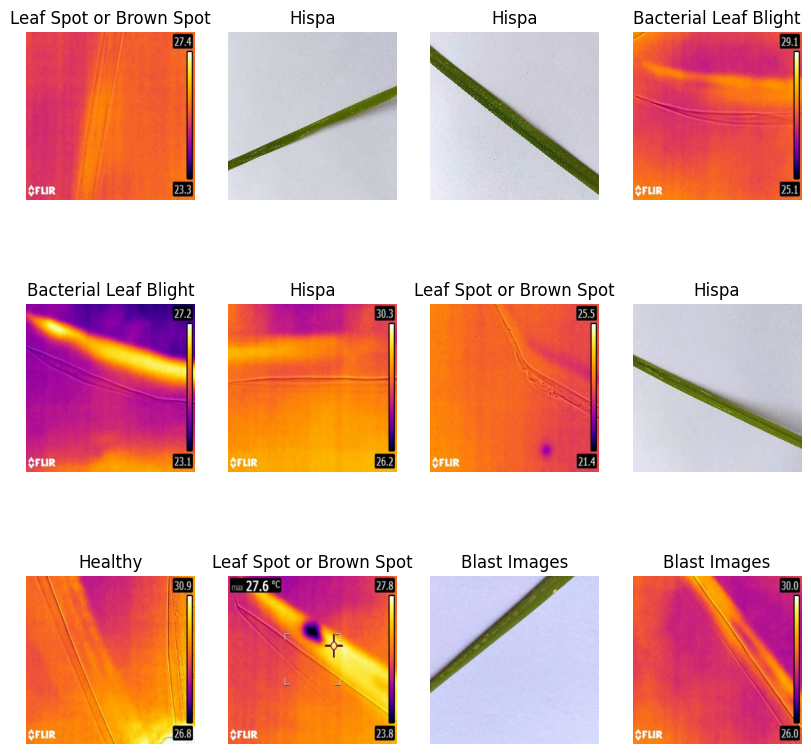

In [10]:
plt.figure(figsize=(10,10))

for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        plt.subplot(3,4,i+1)
    #plt.imshow(image_batch[0].numpy()) #These Image Is In Float
    
    #Converted From Float Into Int
        plt.imshow(image_batch[i].numpy().astype("uint8"))
    
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

# Training The Model

## 80% = Training Data
## 20% = 10% Validation 10% Test

At The End of Every EPOCHS, We Use The Validation DataSet(10%) To The Validation.
Once We Are Done Through 50 EPOCHS, Now We Have Final Model After 50 EPOCHS,

Then We Are Going To Use 10% DataSet Which Is Called As Test DataSet To Measure The Accuracy of The Model.

In [11]:
print("Length of The DataSet = ",len(dataset))

#Starting 80% of the 26
train_size= 0.8
print("80% of The DataSet = ",len(dataset)*train_size)


train_ds=dataset.take(20)
print("Size of the Train Dataset = ",len(train_ds))

test_ds = dataset.skip(20)
print("Length of the Test Dataset = ",len(test_ds))

val_size=0.1
print("Size of the Validation Sample = ",len(dataset)*val_size)

val_ds = test_ds.skip(2)
print("Length of the Validation Dataset = ",len(val_ds))

test_ds = test_ds.skip(2)
print("Length of the Test Dataset = ",len(test_ds))

Length of The DataSet =  26
80% of The DataSet =  20.8
Size of the Train Dataset =  20
Length of the Test Dataset =  6
Size of the Validation Sample =  2.6
Length of the Validation Dataset =  4
Length of the Test Dataset =  4


### Goal of these Function is to take dataset, split ratio (train-test-validation)

In [12]:
def get_dataset_partitions_tf(ds,train_split=0.8, val_split=0.1, test_split = 0.1, shuffle=True, shuffle_size=1000, random_state=None):
    ds_size=len(ds)
    
    if shuffle:
        ds=ds.shuffle(shuffle_size, seed=26) #Predictiability, if we do same seed every time it will give same result. 
    
    train_size= int(train_split * ds_size)
    val_size= int(val_split * ds_size)
    
    
    train_ds= ds.take(train_size)
    
    
#validationdataset = ds.skip(train_size) in that we taking validation size (.take(val_size))
#testdataset = ds.skip(train_size) in that we are skipping validation size (.skip(val_size))    
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds

# Train Test Split

In [13]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset, random_state=42)

In [14]:
print("Length of Train DataSet = ",len(train_ds))
print("Length of Test DataSet = ",len(test_ds))
print("Length of Validation DataSet = ",len(val_ds))

Length of Train DataSet =  20
Length of Test DataSet =  4
Length of Validation DataSet =  2


In [15]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

# Pre-Processing

In [16]:
#Our Images Are Already 256*256 But If We Are Providing Image Which Is Not 256*256 Then This Will Take Care of It.

resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255),
])

In [17]:
#DataAugmentation Used To Make Model ROBUST By Using Flip, Rotation, RandomZoom, RandomWidth, RandomContrast, Normalization.

data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.4)
])

# Build The Model

In [193]:
# input_shape = (BATCH_SIZE,IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
# n_classes=5

# model = models.Sequential([
    # resize_and_rescale,
    # data_augmentation,
    # layers.Conv2D(32, (3,3), activation = "relu", input_shape = input_shape),
    # layers.MaxPooling2D((2,2)),  #MaxPooling Used To Preserve The Feature And Reduce The Size of The Image.
    
    # layers.Conv2D(64, kernel_size=(3,3), activation="relu"),  #KernelSize=Filters
   # /* layers.MaxPooling2D((2,2)),
    # layers.Conv2D(64, kernel_size=(3,3), activation="LeakyReLU"),
    # layers.MaxPooling2D((2,2)),
    
    # layers.Conv2D(64, (3,3), activation="LeakyReLU"),
    # layers.MaxPooling2D((2,2)),
    
    # layers.Conv2D(128, (3,3), activation="LeakyReLU"),
    # layers.MaxPooling2D((2,2)),
    
    # layers.Conv2D(64,(3,3), activation="relu"),
    # layers.MaxPooling2D((2,2)),
    
    # layers.Flatten(),  #Array of Neurons

    # layers.Dense(64, activation="relu"), #Dense Layer = Hidden Layers
    # layers.Dense(64, activation="LeakyReLU"),
    # layers.Dense(64, activation="LeakyReLU"),
    # layers.Dense(32, activation="relu"),
    # layers.Dense(n_classes, activation="softmax") #Softmax Will Normalize The Probabability of The Classes.
# ])

# model.build(input_shape=input_shape)




In [18]:
input_shape = (BATCH_SIZE,IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes=5


model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])


model.build(input_shape=input_shape)

In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

In [20]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer = Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

In [21]:
history = model.fit(train_ds,
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          verbose=1,
          validation_data=val_ds,#To Track The Accuracy
               )

Epoch 1/50


C:\Users\hp\deeplearning\lib\site-packages\keras\backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


20/20 [==============================] - 75s 3s/step - loss: 1.5104 - accuracy: 0.3291 - val_loss: 1.3007 - val_accuracy: 0.4688
Epoch 2/50
20/20 [==============================] - 45s 2s/step - loss: 1.2936 - accuracy: 0.4882 - val_loss: 1.2332 - val_accuracy: 0.4688
Epoch 3/50
20/20 [==============================] - 51s 3s/step - loss: 1.0992 - accuracy: 0.5449 - val_loss: 0.9422 - val_accuracy: 0.6094
Epoch 4/50
20/20 [==============================] - 61s 3s/step - loss: 0.9938 - accuracy: 0.5811 - val_loss: 0.8723 - val_accuracy: 0.6094
Epoch 5/50
20/20 [==============================] - 59s 3s/step - loss: 0.8697 - accuracy: 0.6819 - val_loss: 0.7233 - val_accuracy: 0.7344
Epoch 6/50
20/20 [==============================] - 70s 4s/step - loss: 0.7976 - accuracy: 0.6504 - val_loss: 0.8219 - val_accuracy: 0.6719
Epoch 7/50
20/20 [==============================] - 66s 3s/step - loss: 0.6983 - accuracy: 0.7039 - val_loss: 0.5955 - val_accuracy: 0.7656
Epoch 8/50
20/20 [=============

In [22]:
scores= model.evaluate(test_ds)

2/2 [==============================] - 2s 811ms/step - loss: 0.4099 - accuracy: 0.9375


In [23]:
history.history["accuracy"]

[0.32913386821746826,
 0.4881889820098877,
 0.5448818802833557,
 0.5811023712158203,
 0.6818897724151611,
 0.6503937244415283,
 0.7039369940757751,
 0.7748031616210938,
 0.8031495809555054,
 0.8031495809555054,
 0.8314960598945618,
 0.8755905628204346,
 0.856692910194397,
 0.8629921078681946,
 0.9149606227874756,
 0.896062970161438,
 0.9275590777397156,
 0.8881889581680298,
 0.9007874131202698,
 0.965354323387146,
 0.9700787663459778,
 0.9732283353805542,
 0.925984263420105,
 0.9401574730873108,
 0.9732283353805542,
 0.9811023473739624,
 0.9811023473739624,
 0.9968503713607788,
 0.9968503713607788,
 0.9937008023262024,
 0.9937008023262024,
 0.9984251856803894,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9622046947479248,
 0.9338582754135132,
 0.9385826587677002,
 0.9669291377067566,
 0.977952778339386,
 0.9622046947479248,
 0.9811023473739624,
 0.982677161693573,
 0.977952778339386,
 0.977952778339386,
 0.9385826587677002,
 0.9748031497001648,
 0.9905511736869812,
 0.995275616645813]

In [24]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 20}

In [25]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [26]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss= history.history['val_loss']

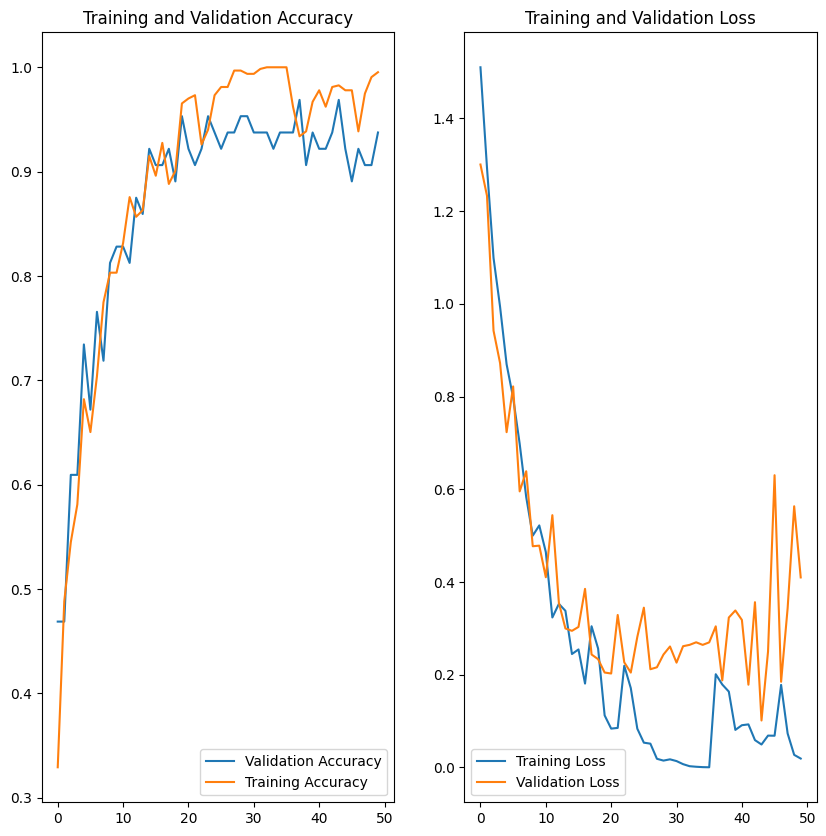

In [27]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), val_acc, label="Validation Accuracy")
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label="Training Loss")
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='lower left')
plt.title('Training and Validation Loss')
plt.show()

First Image To Predict
Actual Label:  Hispa
1/1 [==============================] - 1s 1s/step
Predicted Label:  Hispa


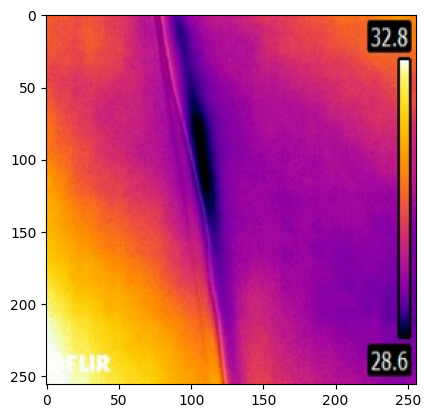

In [28]:
for image_batch, label_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = label_batch[0]
    
    print("First Image To Predict")
    plt.imshow(first_image)
    print("Actual Label: ", class_names[first_label])
    
    batch_prediction= model.predict(image_batch)
    print("Predicted Label: ",class_names[np.argmax(batch_prediction[0])])
    

# Prediction 

In [29]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])),2)
    return predicted_class, confidence
    

1/1 [==============================] - 0s 75ms/step


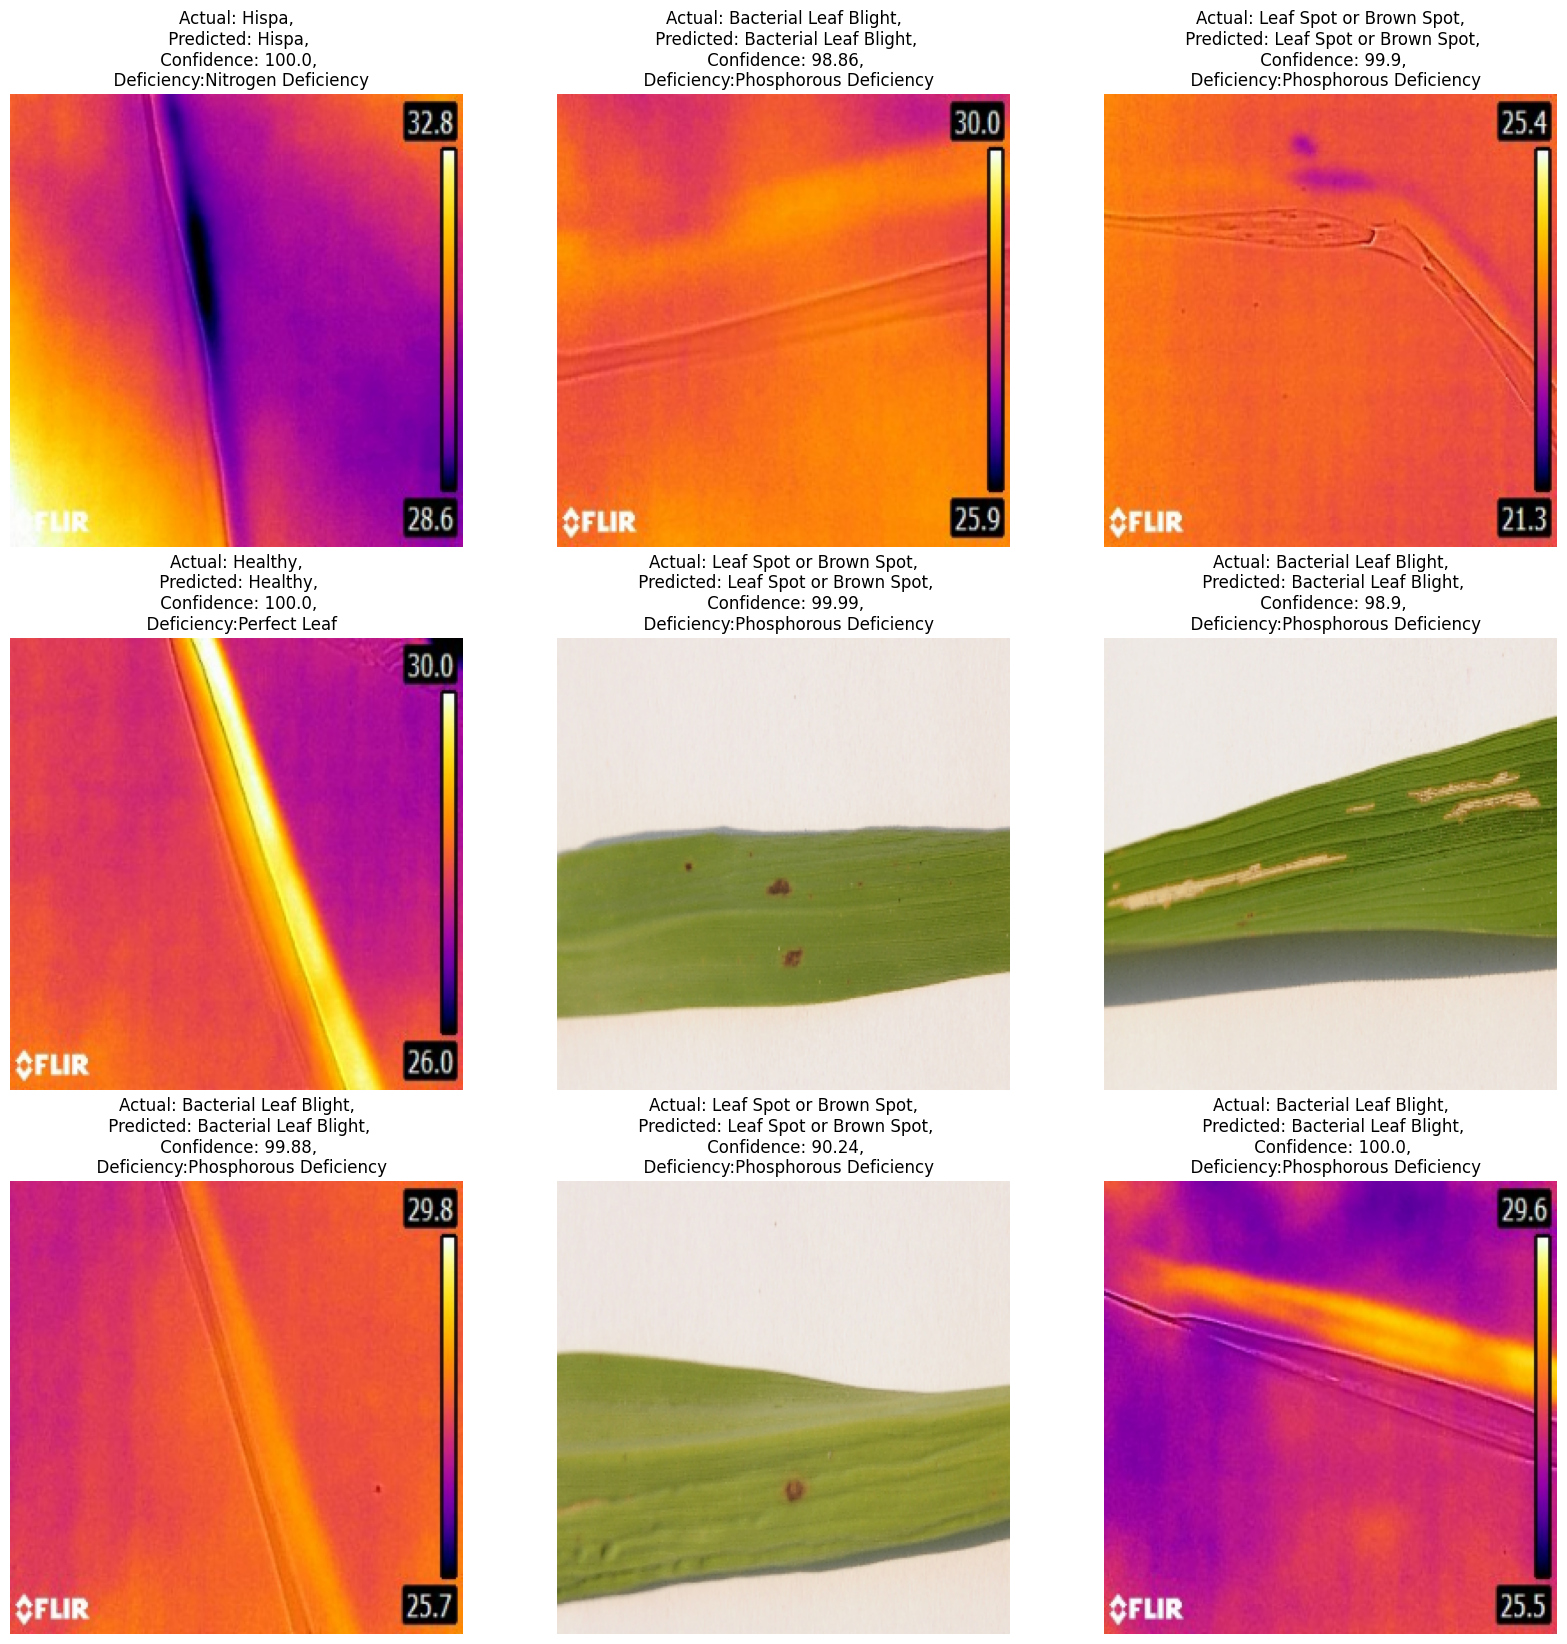

In [30]:
plt.figure(figsize=(20,20))

for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
            
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class},\n Confidence: {confidence},\n  Deficiency:{dict_labels[predicted_class]}")
        plt.axis("off")